In [578]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [579]:
# Reading your api key environment variable
api_key = "1bdbdab472c048398a14e434cde39dbb"

In [580]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [581]:
# Fetching the Macy's news articles
pp_headlines = newsapi.get_everything(q="Paypal",
                                      language="en",
                                      sort_by="relevancy")
#pp_headlines

In [582]:
# Print total number of articles PayPal
print(f"Total articles about Paypal: {pp_headlines['totalResults']}")

Total articles about Paypal: 5599


In [583]:
# Fetching the Carnival news articles
ccl_headlines = newsapi.get_everything(q="carnival", language="en")

In [584]:
# Print total number of articles CCL
print(f"Total articles about Carnival: {ccl_headlines['totalResults']}")

Total articles about Carnival: 1238


In [585]:
# Fetching the delta news articles
dal_headlines = newsapi.get_everything(q="delta", language="en")

In [586]:
# Print total number of articles DAL
print(f"Total articles about Delta: {dal_headlines['totalResults']}")

Total articles about Delta: 4674


In [587]:
# Fetching the ETSY news articles
etsy_headlines = newsapi.get_everything(q="ETSY", language="en")

In [588]:
# Print total number of articles ETSY
print(f"Total articles about ETSY: {etsy_headlines['totalResults']}")

Total articles about ETSY: 872


In [589]:
# Fetching the S&P500 news articles
sp500_headlines = newsapi.get_everything(q="s&p 500", language="en")

In [590]:
# Print total number of articles S&P500
print(f"Total articles about S&P 500: {sp500_headlines['totalResults']}")

Total articles about S&P 500: 9939


In [591]:
# Creating the paypal sentiment scores DataFrame
pp_sentiments = []

for article in pp_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        pp_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
pp_df = pd.DataFrame(pp_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
pp_df = pp_df[cols]
pp_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.8271,0.194,0.806,0.000,"After years of placid admonishments, the tech ..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: The PayPal app logo seen on a mobi...
2,0.0000,0.000,1.000,0.000,Venmo’s bid to become your banking hub now cov...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: The PayPal app logo seen on a mobi...
4,-0.0516,0.070,0.866,0.064,"January\r\n7, 2021\r\n5 min read\r\nOpinions e..."


In [592]:
# Creating the carnival sentiment scores DataFrame
ccl_sentiments = []

for article in ccl_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ccl_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ccl_df = pd.DataFrame(ccl_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ccl_df = ccl_df[cols]
ccl_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3182,0.067,0.933,0.000,By Reuters Staff\r\nJan 11 (Reuters) - Carniva...
1,0.0000,0.000,1.000,0.000,"By Tim McDonaldBusiness reporter, BBC News\r\n..."
2,-0.3182,0.065,0.935,0.000,By Reuters Staff\r\n(Adds detail on cash burn ...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nRIO DE JANEIRO (Reuters) -...
4,0.7845,0.000,0.827,0.173,"For almost a year now, single people looking f..."


In [593]:
# Creating the delta sentiment scores DataFrame
dal_sentiments = []

for article in dal_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        dal_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
dal_df = pd.DataFrame(dal_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
dal_df = dal_df[cols]
dal_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,"Back in 2016, Amazon’s cargo air fleet (then k..."
1,-0.7351,0.212,0.741,0.048,A late-night fire caused significant damage to...
2,-0.1531,0.119,0.778,0.103,By Reuters Staff\r\nDelta Air Lines Inc:\r\n* ...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A Delta Air Li...
4,-0.1531,0.119,0.778,0.103,By Reuters Staff\r\nDelta Air Lines Inc:\r\n* ...


In [594]:
# Creating the ETSY sentiment scores DataFrame
etsy_sentiments = []

for article in etsy_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        etsy_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
etsy_df = pd.DataFrame(etsy_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
etsy_df = etsy_df[cols]
etsy_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.9260,0.000,0.633,0.367,"Roemie Hillenaar and Anca Stefan, the co-found..."
1,0.0000,0.000,1.000,0.000,You may have seen it decorating a fancy foyer ...
2,0.0516,0.056,0.884,0.061,Etsy sellers have been thrown into confusion b...
3,0.6249,0.000,0.873,0.127,The Better Business Bureau has issued an alert...
4,0.6249,0.057,0.753,0.190,The first third-party cases and hangers for Ai...


In [595]:
# Creating the SP500 sentiment scores DataFrame
sp500_sentiments = []

for article in sp500_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sp500_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
sp500_df = pd.DataFrame(sp500_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
sp500_df = sp500_df[cols]
sp500_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3716,0.132,0.868,0.000,Posted \r\nThe Dow and S&amp;P 500 ended modes...
1,0.0000,0.000,1.000,0.000,"(For a Reuters live blog on U.S., UK and Europ..."
2,-0.3716,0.132,0.868,0.000,Posted \r\nThe Dow and S&amp;P 500 ended modes...
3,0.5574,0.000,0.878,0.122,"(For a Reuters live blog on U.S., UK and Europ..."
4,-0.6705,0.159,0.841,0.000,Posted \r\nThe S&amp;P 500 lost ground on Tues...


In [596]:
# Describing the paypal Sentiment
# Compound Scoring:
    # >= 0.05 postive sentiment
    # between -0.05 and 0.05 neutral sentiment
    # <= -0.05 negative sentiment
pp_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.129295,0.022250,0.925250,0.052500
std,0.384591,0.050905,0.083619,0.070345
min,-0.827100,0.000000,0.749000,0.000000
25%,0.000000,0.000000,0.870000,0.000000
50%,0.000000,0.000000,0.932500,0.000000
75%,0.376275,0.000000,1.000000,0.085250
max,0.859100,0.194000,1.000000,0.235000


In [597]:
# Describing the carnival Sentiment
ccl_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.131155,0.027050,0.912250,0.060700
std,0.334813,0.046117,0.086013,0.061994
min,-0.510600,0.000000,0.669000,0.000000
25%,-0.019300,0.000000,0.880500,0.000000
50%,0.073050,0.000000,0.932000,0.067000
75%,0.310275,0.053000,0.963250,0.087250
max,0.784500,0.132000,1.000000,0.201000


In [598]:
# Describing the delta Sentiment
dal_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,-0.046032,0.054947,0.900053,0.045105
std,0.376102,0.062468,0.116183,0.073115
min,-0.735100,0.000000,0.706000,0.000000
25%,-0.153100,0.000000,0.778000,0.000000
50%,0.000000,0.048000,0.952000,0.000000
75%,0.000000,0.101000,1.000000,0.075500
max,0.702400,0.212000,1.000000,0.204000


In [599]:
# Describing the ETSY Sentiment
etsy_df.describe()

,Compound,Negative,Neutral,Positive
count,14.000000,14.000000,14.000000,14.000000
mean,0.324171,0.032786,0.851929,0.115357
std,0.390882,0.038337,0.116559,0.107167
min,-0.421500,0.000000,0.633000,0.000000
25%,0.012900,0.000000,0.763500,0.015000
50%,0.282000,0.018500,0.862000,0.120000
75%,0.624900,0.056750,0.935000,0.173000
max,0.926000,0.106000,1.000000,0.367000


In [600]:
# Describing the SP500 Sentiment
sp500_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.007855,0.032300,0.945550,0.022050
std,0.329275,0.052423,0.054008,0.040821
min,-0.670500,0.000000,0.841000,0.000000
25%,-0.296000,0.000000,0.904000,0.000000
50%,0.000000,0.000000,0.937500,0.000000
75%,0.068300,0.062000,1.000000,0.015500
max,0.557400,0.159000,1.000000,0.122000


# Tokenizer

1. Lowercase each word
2. Removing punctuation
3. Removing stopwords

In [601]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [602]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [603]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Expanding the default stopwords list if necessary
    sw = stopwords.words("english")
    sw.append("Macy")
    sw.append("co")
    sw.append("inc")
    sw.append("u")
    sw.append("uk")
    sw.append("char")
    sw.append("char+")
    sw.append("chars")
    sw.append("chars]")
    sw.append("char]")
    sw.append("amp")
    sw.append("p")
    sw.append("type")
    sw.append("live")
    sw.append("file")
    sw.append("european")
    sw.append("staff")
    sw.append("reuters")
    
    # cleaning text   
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    # Removing the punctuation
    words = word_tokenize(re_clean)
    # Converting the words to lowercase
    words = [word.lower() for word in words]
    # Removing the stop words
    words = [word for word in words if word not in sw]
    # Lemmatizing Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [604]:
# Creating a new tokens column for paypal
pp_df["tokens"] = pp_df["text"].apply(tokenizer)
pp_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.8271,0.194,0.806,0.000,"After years of placid admonishments, the tech ...","[year, placid, admonishment, tech, world, came..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: The PayPal app logo seen on a mobi...,"[photo, paypal, app, logo, seen, mobile, phone..."
2,0.0000,0.000,1.000,0.000,Venmo’s bid to become your banking hub now cov...,"[venmo, bid, become, banking, hub, cover, chec..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: The PayPal app logo seen on a mobi...,"[photo, paypal, app, logo, seen, mobile, phone..."
4,-0.0516,0.070,0.866,0.064,"January\r\n7, 2021\r\n5 min read\r\nOpinions e...","[january, min, read, opinion, expressed, entre..."


In [605]:
# Creating a new tokens column for ccl
ccl_df["tokens"] = ccl_df["text"].apply(tokenizer)
ccl_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3182,0.067,0.933,0.000,By Reuters Staff\r\nJan 11 (Reuters) - Carniva...,"[jan, carnival, corp, reported, preliminary, a..."
1,0.0000,0.000,1.000,0.000,"By Tim McDonaldBusiness reporter, BBC News\r\n...","[tim, mcdonaldbusiness, reporter, bbc, news, i..."
2,-0.3182,0.065,0.935,0.000,By Reuters Staff\r\n(Adds detail on cash burn ...,"[add, detail, cash, burn, rate, jan, carnival,..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nRIO DE JANEIRO (Reuters) -...,"[rio, de, janeiro, possible, host, carnival, c..."
4,0.7845,0.000,0.827,0.173,"For almost a year now, single people looking f...","[almost, year, single, people, looking, love, ..."


In [606]:
# Creating a new tokens column for dal
dal_df["tokens"] = dal_df["text"].apply(tokenizer)
dal_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,"Back in 2016, Amazon’s cargo air fleet (then k...","[back, amazon, cargo, air, fleet, known, prime..."
1,-0.7351,0.212,0.741,0.048,A late-night fire caused significant damage to...,"[late, night, fire, caused, significant, damag..."
2,-0.1531,0.119,0.778,0.103,By Reuters Staff\r\nDelta Air Lines Inc:\r\n* ...,"[delta, air, line, delta, air, say, requiring,..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A Delta Air Li...,"[photo, delta, air, line, airbus, plane, take,..."
4,-0.1531,0.119,0.778,0.103,By Reuters Staff\r\nDelta Air Lines Inc:\r\n* ...,"[delta, air, line, delta, air, say, requiring,..."


In [607]:
# Creating a new tokens column for etsy
etsy_df["tokens"] = etsy_df["text"].apply(tokenizer)
etsy_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.9260,0.000,0.633,0.367,"Roemie Hillenaar and Anca Stefan, the co-found...","[roemie, hillenaar, anca, stefan, founder, cre..."
1,0.0000,0.000,1.000,0.000,You may have seen it decorating a fancy foyer ...,"[may, seen, decorating, fancy, foyer, hgtv, eu..."
2,0.0516,0.056,0.884,0.061,Etsy sellers have been thrown into confusion b...,"[etsy, seller, thrown, confusion, complex, cha..."
3,0.6249,0.000,0.873,0.127,The Better Business Bureau has issued an alert...,"[better, business, bureau, issued, alert, grif..."
4,0.6249,0.057,0.753,0.190,The first third-party cases and hangers for Ai...,"[first, third, party, case, hanger, airpods, m..."


In [608]:
# Creating a new tokens column for sp500
sp500_df["tokens"] = sp500_df["text"].apply(tokenizer)
sp500_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3716,0.132,0.868,0.000,Posted \r\nThe Dow and S&amp;P 500 ended modes...,"[posted, dow, ended, modestly, lower, friday, ..."
1,0.0000,0.000,1.000,0.000,"(For a Reuters live blog on U.S., UK and Europ...","[blog, stock, market, click, news, window, int..."
2,-0.3716,0.132,0.868,0.000,Posted \r\nThe Dow and S&amp;P 500 ended modes...,"[posted, dow, ended, modestly, lower, friday, ..."
3,0.5574,0.000,0.878,0.122,"(For a Reuters live blog on U.S., UK and Europ...","[blog, stock, market, click, news, window, net..."
4,-0.6705,0.159,0.841,0.000,Posted \r\nThe S&amp;P 500 lost ground on Tues...,"[posted, lost, ground, tuesday, concern, new, ..."


# NGrams and Frequency Analysis

Look at the ngrams and word frequency for each ticker symbol

1. Set n-grams to N=2 using NLTK
2. List the top 10 words for each ticker

In [609]:
from nltk import ngrams
from collections import Counter

In [610]:
# Generating the paypal N-grams where N=2
pp_text = pp_df["text"].str.cat()
clean_pp_text =  tokenizer(pp_text)
bigram_counts = Counter(ngrams(clean_pp_text, n=2))
bigram_counts.most_common(10)

[(('paypal', 'holding'), 8),
 (('affirm', 'holding'), 5),
 (('holding', 'founded'), 5),
 (('founded', 'paypal'), 5),
 (('founder', 'max'), 5),
 (('max', 'levchin'), 5),
 (('lending', 'startup'), 4),
 (('startup', 'affirm'), 4),
 (('holding', 'founder'), 4),
 (('holding', 'inc'), 3)]

In [611]:
# Generating the ccl N-grams where N=2
ccl_text = ccl_df["text"].str.cat()
clean_ccl_text =  tokenizer(ccl_text)
bigram_counts = Counter(ngrams(clean_ccl_text, n=2))
bigram_counts.most_common(10)

[(('net', 'loss'), 3),
 (('loss', 'billion'), 3),
 (('italian', 'shipbuilder'), 3),
 (('shipbuilder', 'fincantieris'), 3),
 (('fincantieris', 'planned'), 3),
 (('planned', 'acquisition'), 3),
 (('acquisition', 'state'), 3),
 (('state', 'controlled'), 3),
 (('controlled', 'french'), 3),
 (('french', 'rival'), 3)]

In [612]:
# Generating the dal N-grams where N=2
dal_text = dal_df["text"].str.cat()
clean_dal_text =  tokenizer(dal_text)
bigram_counts = Counter(ngrams(clean_dal_text, n=2))
bigram_counts.most_common(10)

[(('delta', 'air'), 15),
 (('air', 'line'), 10),
 (('photo', 'delta'), 9),
 (('negative', 'covid'), 4),
 (('covid', 'test'), 4),
 (('coronavirus', 'disease'), 4),
 (('disease', 'covid'), 4),
 (('line', 'airbus'), 3),
 (('airbus', 'plane'), 3),
 (('plane', 'take'), 3)]

In [613]:
# Generating the etsy N-grams where N=2!
etsy_text = etsy_df["text"].str.cat()
clean_etsy_text =  tokenizer(etsy_text)
bigram_counts = Counter(ngrams(clean_etsy_text, n=2))
bigram_counts.most_common(10)

[(('creative', 'fabrica'), 2),
 (('apple', 'smart'), 2),
 (('smart', 'case'), 2),
 (('keep', 'warm'), 2),
 (('roemie', 'hillenaar'), 1),
 (('hillenaar', 'anca'), 1),
 (('anca', 'stefan'), 1),
 (('stefan', 'founder'), 1),
 (('founder', 'creative'), 1),
 (('fabrica', 'creative'), 1)]

In [614]:
# Generating the sp500 N-grams where N=2!
sp500_text = sp500_df["text"].str.cat()
clean_sp500_text =  tokenizer(sp500_text)
bigram_counts = Counter(ngrams(clean_sp500_text, n=2))
bigram_counts.most_common(10)

[(('new', 'york'), 8),
 (('blog', 'stock'), 6),
 (('stock', 'market'), 6),
 (('market', 'click'), 6),
 (('click', 'news'), 6),
 (('news', 'window'), 6),
 (('wall', 'street'), 4),
 (('dividend', 'payment'), 3),
 (('dow', 'nasdaq'), 3),
 (('posted', 'dow'), 2)]

In [615]:
# Using the token_count function to generate the top 10 words
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [616]:
# Getting the top 10 words for paypal
token_count(clean_pp_text, N=10)

[('holding', 13),
 ('paypal', 12),
 ('company', 5),
 ('lending', 5),
 ('startup', 5),
 ('affirm', 5),
 ('founded', 5),
 ('founder', 5),
 ('max', 5),
 ('levchin', 5)]

In [617]:
# Getting the top 10 words for ccl
token_count(clean_ccl_text, N=10)

[('new', 7),
 ('carnival', 6),
 ('cruise', 5),
 ('de', 5),
 ('state', 5),
 ('monday', 4),
 ('sea', 4),
 ('said', 4),
 ('reported', 3),
 ('net', 3)]

In [618]:
# Getting the top 10 words for dal
token_count(clean_dal_text, N=10)

[('delta', 20),
 ('air', 18),
 ('line', 10),
 ('photo', 9),
 ('covid', 8),
 ('plane', 7),
 ('passenger', 6),
 ('sydney', 6),
 ('airport', 6),
 ('united', 6)]

In [619]:
# Getting the top 10 words for etsy
token_count(clean_etsy_text, N=10)

[('consumer', 4),
 ('time', 4),
 ('case', 3),
 ('purchase', 3),
 ('creative', 2),
 ('fabrica', 2),
 ('like', 2),
 ('seen', 2),
 ('change', 2),
 ('good', 2)]

In [620]:
# Getting the top 10 words for sp500
token_count(clean_sp500_text, N=10)

[('new', 10),
 ('stock', 9),
 ('york', 8),
 ('dow', 6),
 ('blog', 6),
 ('market', 6),
 ('click', 6),
 ('news', 6),
 ('window', 6),
 ('jump', 6)]

# Word Clouds

In [621]:
import numpy as np
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

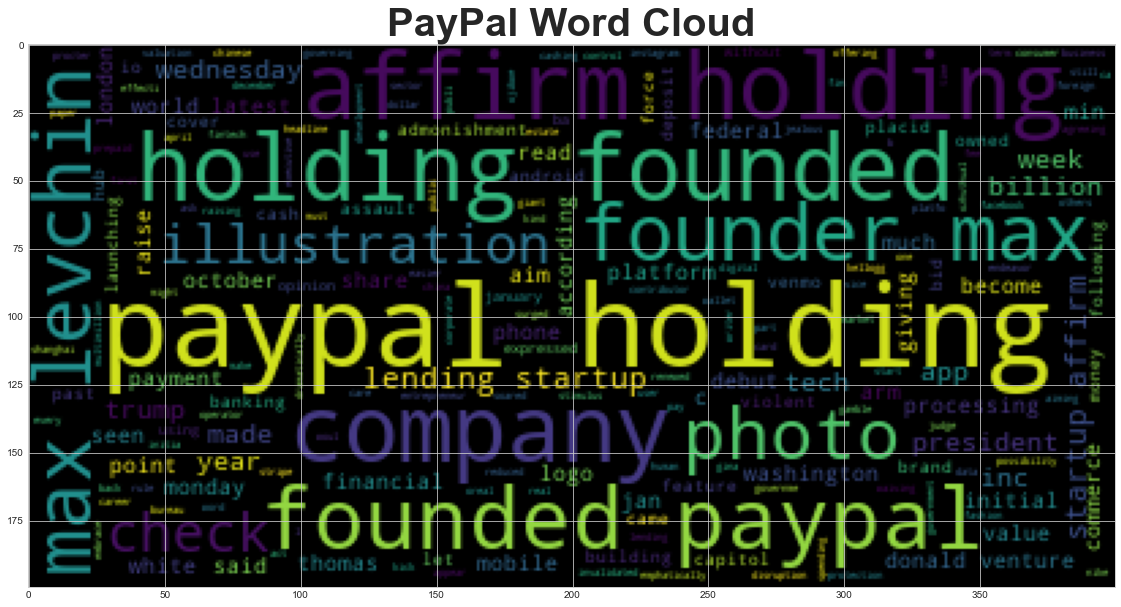

In [622]:
# Generating the Paypal word cloud
big_string = '. '.join(clean_pp_text)
wc = WordCloud().generate(big_string)
plt.title("PayPal Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

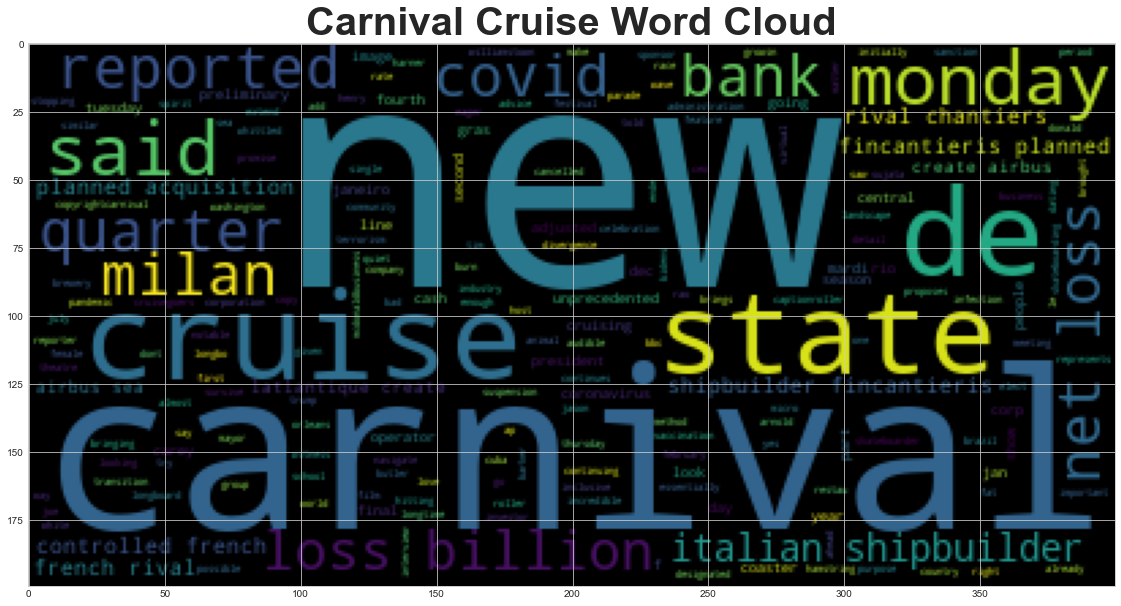

In [623]:
# Generating the ccl word cloud
big_string = '. '.join(clean_ccl_text)
wc = WordCloud().generate(big_string)
plt.title("Carnival Cruise Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

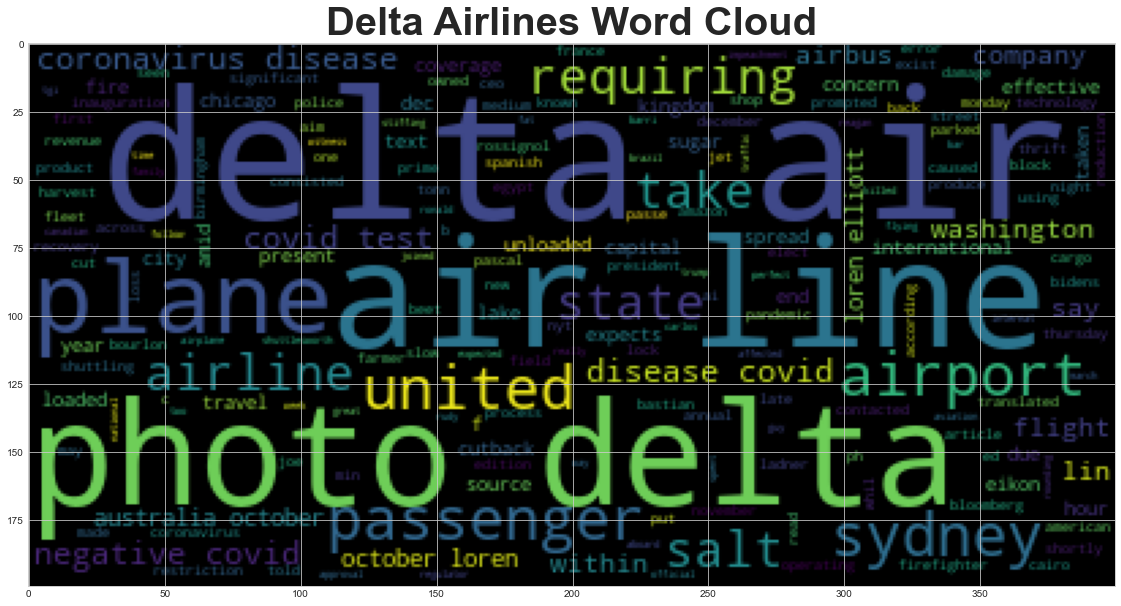

In [624]:
# Generating the dal word cloud
big_string = '. '.join(clean_dal_text)
wc = WordCloud().generate(big_string)
plt.title("Delta Airlines Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

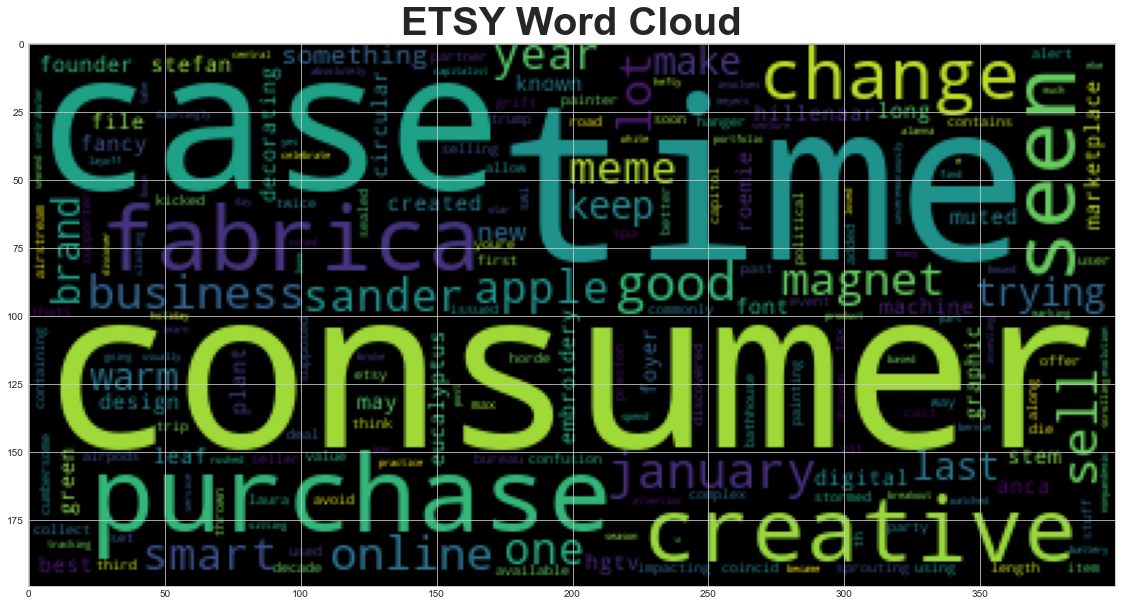

In [625]:
# Generating the etsy word cloud
big_string = '. '.join(clean_etsy_text)
wc = WordCloud().generate(big_string)
plt.title("ETSY Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

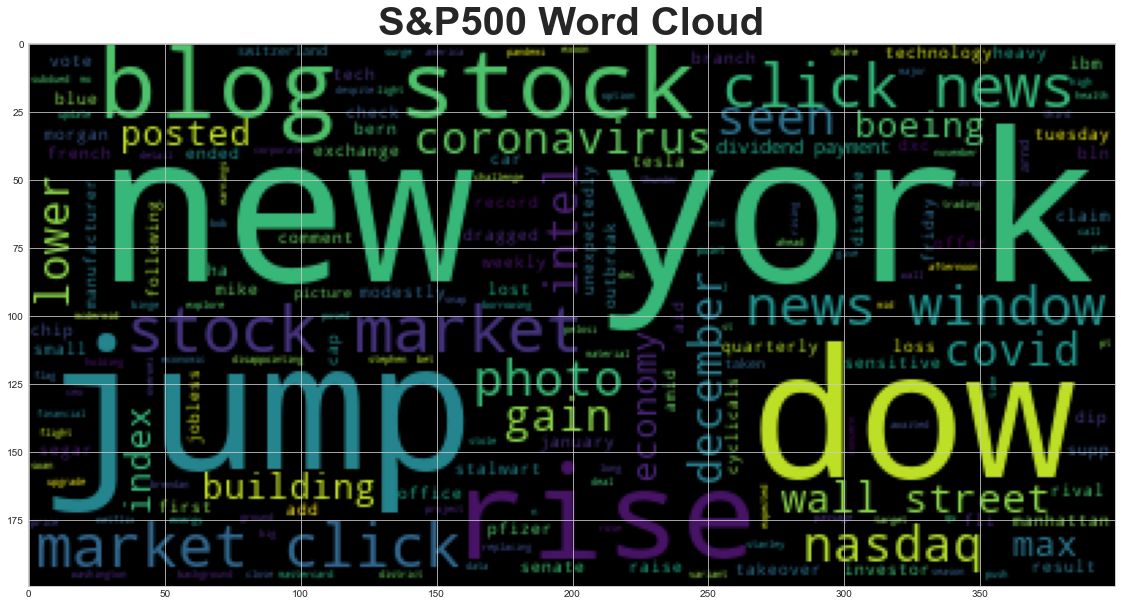

In [626]:
# Generating the SP500 word cloud
big_string = '. '.join(clean_sp500_text)
wc = WordCloud().generate(big_string)
plt.title("S&P500 Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)